100%|██████████| 170498071/170498071 [00:03<00:00, 47272630.84it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


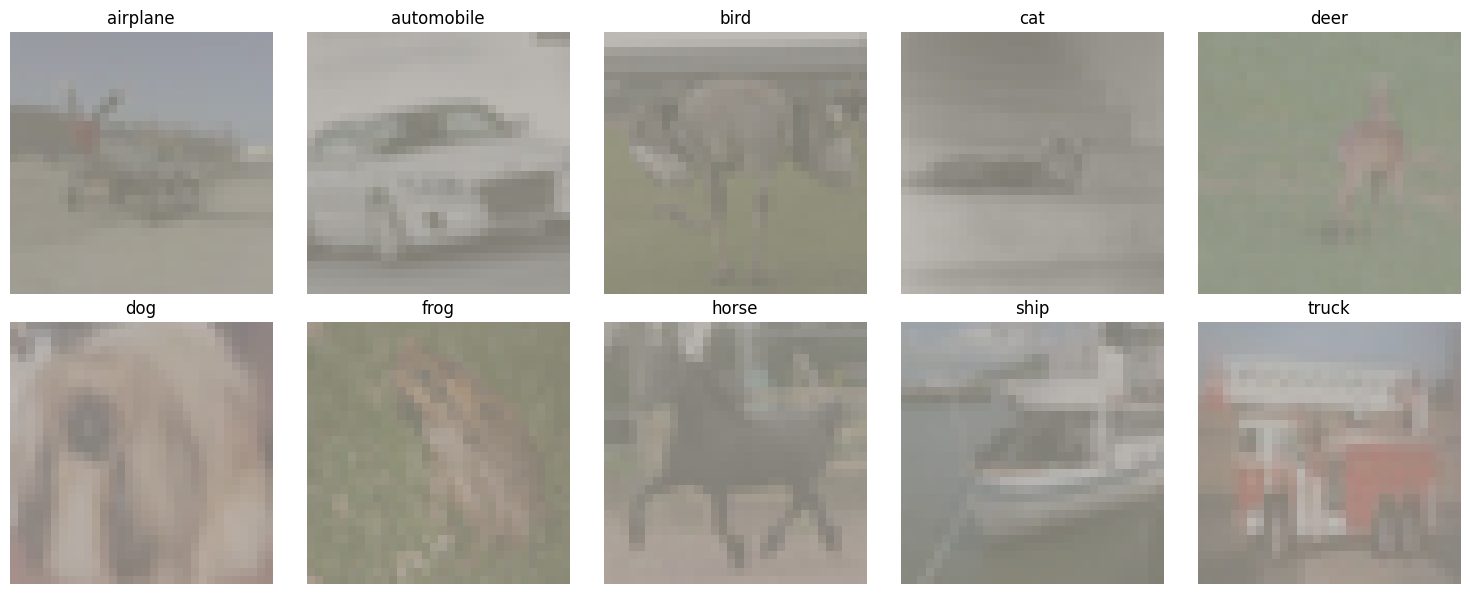

Epoch [1/30]


Train Loss: 1.6728 | Train Acc: 40.28%
Val   Loss: 1.4665 | Val   Acc: 47.97%
Epoch [2/30]


Train Loss: 1.4305 | Train Acc: 50.13%
Val   Loss: 1.4125 | Val   Acc: 50.29%
Epoch [3/30]


Train Loss: 1.3791 | Train Acc: 52.31%
Val   Loss: 1.3620 | Val   Acc: 52.81%
Epoch [4/30]


Train Loss: 1.3517 | Train Acc: 53.35%
Val   Loss: 1.3440 | Val   Acc: 54.01%
Epoch [5/30]


Train Loss: 1.3335 | Train Acc: 54.06%
Val   Loss: 1.3076 | Val   Acc: 55.17%
Epoch [6/30]


Train Loss: 1.3164 | Train Acc: 55.05%
Val   Loss: 1.3186 | Val   Acc: 55.08%
Epoch [7/30]


Train Loss: 1.3124 | Train Acc: 54.94%
Val   Loss: 1.3176 | Val   Acc: 55.76%
Epoch [8/30]


Train Loss: 1.3046 | Train Acc: 55.25%
Val   Loss: 1.3785 | Val   Acc: 52.71%
Epoch [9/30]


Train Loss: 1.2890 | Train Acc: 55.90%
Val   Loss: 1.3113 | Val   Acc: 54.98%
Epoch [10/30]


Train Loss: 1.2880 | Train Acc: 55.78%
Val   Loss: 1.3119 | Val   Acc: 54.31%
Epoch [11/30]


Train Loss: 1.2880 | Train Acc: 55.57%
Val   Loss: 1.2929 | Val   Acc: 56.13%
Epoch [12/30]


Train Loss: 1.2791 | Train Acc: 56.35%
Val   Loss: 1.2910 | Val   Acc: 56.56%
Epoch [13/30]


Train Loss: 1.2693 | Train Acc: 57.07%
Val   Loss: 1.2958 | Val   Acc: 55.47%
Epoch [14/30]


Train Loss: 1.2802 | Train Acc: 56.37%
Val   Loss: 1.2957 | Val   Acc: 55.32%
Epoch [15/30]


Train Loss: 1.2750 | Train Acc: 56.30%
Val   Loss: 1.2555 | Val   Acc: 56.83%
Epoch [16/30]


Train Loss: 1.2652 | Train Acc: 56.94%
Val   Loss: 1.2485 | Val   Acc: 57.04%
Epoch [17/30]


Train Loss: 1.2591 | Train Acc: 57.19%
Val   Loss: 1.2527 | Val   Acc: 56.97%
Epoch [18/30]


Train Loss: 1.2650 | Train Acc: 56.84%
Val   Loss: 1.2742 | Val   Acc: 56.99%
Epoch [19/30]


Train Loss: 1.2521 | Train Acc: 57.42%
Val   Loss: 1.2421 | Val   Acc: 58.26%
Epoch [20/30]


Train Loss: 1.2562 | Train Acc: 57.23%
Val   Loss: 1.2571 | Val   Acc: 57.24%
Epoch [21/30]


Train Loss: 1.2575 | Train Acc: 56.96%
Val   Loss: 1.2921 | Val   Acc: 55.42%
Epoch [22/30]


Train Loss: 1.2449 | Train Acc: 57.64%
Val   Loss: 1.2500 | Val   Acc: 57.42%
Epoch [23/30]


Train Loss: 1.2497 | Train Acc: 57.45%
Val   Loss: 1.2383 | Val   Acc: 57.72%
Epoch [24/30]


Train Loss: 1.2452 | Train Acc: 57.37%
Val   Loss: 1.2553 | Val   Acc: 56.72%
Epoch [25/30]


Train Loss: 1.2450 | Train Acc: 57.90%
Val   Loss: 1.2780 | Val   Acc: 56.34%
Epoch [26/30]


Train Loss: 1.2401 | Train Acc: 57.94%
Val   Loss: 1.2992 | Val   Acc: 55.45%
Epoch [27/30]


Train Loss: 1.2319 | Train Acc: 58.14%
Val   Loss: 1.3179 | Val   Acc: 56.26%
Epoch [28/30]


Train Loss: 1.2284 | Train Acc: 58.16%
Val   Loss: 1.2036 | Val   Acc: 59.21%
Epoch [29/30]


Train Loss: 1.2466 | Train Acc: 57.49%
Val   Loss: 1.2593 | Val   Acc: 58.39%
Epoch [30/30]


Training:  63%|██████▎   | 197/313 [00:06<00:03, 35.58it/s, loss=1.01] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##############################################
# Download and prepare the CIFAR-10 data
##############################################
# CIFAR-10:
# - Train: 50,000 images
# - Test: 10,000 images
# We will create a validation set of 10,000 images from the train set, leaving 40,000 for training.

# Data augmentation for training
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # random crop with padding
    transforms.RandomHorizontalFlip(),     # random horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

# For validation and test, we only normalize
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

# Download CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_dataset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

# Classes in CIFAR-10
classes = train_dataset.classes

# Show one random image from every class with the label
def imshow(img, mean, std):
    # Unnormalize and convert back to (0,1) range for display
    img = img.cpu().numpy().transpose((1, 2, 0))
    img = img * std + mean
    img = np.clip(img, 0, 1)
    return img

means = np.array([0.4914, 0.4822, 0.4465])
stds = np.array([0.2470, 0.2435, 0.2616])

# Find a random example of each class from the training dataset without augmentation
original_train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transforms.ToTensor())
all_targets = np.array(original_train_dataset.targets)

fig, axs = plt.subplots(2, 5, figsize=(15,6))
axs = axs.flatten()

for i, class_name in enumerate(classes):
    class_indices = np.where(all_targets == i)[0]
    random_index = random.choice(class_indices)
    img, label = original_train_dataset[random_index]
    img_show = imshow(img, means, stds)
    axs[i].imshow(img_show)
    axs[i].set_title(class_name)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

##############################################
# Create a validation split from training data
##############################################
num_train = len(train_dataset)  # should be 50000
indices = list(range(num_train))
np.random.shuffle(indices)

val_size = 10000
train_idx, val_idx = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler   = SubsetRandomSampler(val_idx)

#######################################
# Create DataLoaders
#######################################
batch_size = 128
epochs = 30  # set epochs to 30 as requested

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
val_loader   = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

#######################################
# Baseline Model
#######################################
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

baseline_model = BaselineModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(baseline_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

#######################################
# Training and Validation Functions
#######################################
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, loader, criterion, device, mode="Validation"):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc=mode, leave=False)
    with torch.no_grad():
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

#######################################
# Training Loop
#######################################
best_val_acc = 0.0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    print(f"Epoch [{epoch+1}/{epochs}]")
    train_loss, train_acc = train_one_epoch(baseline_model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(baseline_model, val_loader, criterion, device, mode="Validation")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(baseline_model.state_dict(), 'best_baseline_model.pth')

#######################################
# Plotting Training Curves
#######################################
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accs, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30]


Train Loss: 2.1721 | Train Acc: 17.05%
Val   Loss: 1.9856 | Val   Acc: 26.19%
Epoch [2/30]


Train Loss: 1.8094 | Train Acc: 31.46%
Val   Loss: 1.6113 | Val   Acc: 39.62%
Epoch [3/30]


Train Loss: 1.5960 | Train Acc: 40.46%
Val   Loss: 1.4583 | Val   Acc: 46.38%
Epoch [4/30]


Train Loss: 1.4451 | Train Acc: 46.96%
Val   Loss: 1.2969 | Val   Acc: 51.86%
Epoch [5/30]


Train Loss: 1.3168 | Train Acc: 52.27%
Val   Loss: 1.1949 | Val   Acc: 55.87%
Epoch [6/30]


Train Loss: 1.1814 | Train Acc: 57.65%
Val   Loss: 1.0833 | Val   Acc: 60.90%
Epoch [7/30]


Training:   2%|▏         | 5/313 [00:00<00:19, 15.95it/s, loss=1.12] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train Loss: 0.9830 | Train Acc: 65.39%
Val   Loss: 0.9491 | Val   Acc: 66.83%
Epoch [9/30]


Train Loss: 0.9210 | Train Acc: 67.79%
Val   Loss: 0.8389 | Val   Acc: 70.63%
Epoch [10/30]


Train Loss: 0.8526 | Train Acc: 70.54%
Val   Loss: 0.8075 | Val   Acc: 72.35%
Epoch [11/30]


Train Loss: 0.7983 | Train Acc: 72.21%
Val   Loss: 0.7508 | Val   Acc: 73.82%
Epoch [12/30]


Train Loss: 0.7523 | Train Acc: 74.10%
Val   Loss: 0.7138 | Val   Acc: 74.75%
Epoch [13/30]


Train Loss: 0.7118 | Train Acc: 75.55%
Val   Loss: 0.6672 | Val   Acc: 76.59%
Epoch [14/30]


Train Loss: 0.6828 | Train Acc: 76.64%
Val   Loss: 0.6383 | Val   Acc: 77.72%
Epoch [15/30]


Train Loss: 0.6515 | Train Acc: 77.51%
Val   Loss: 0.6766 | Val   Acc: 77.23%
Epoch [16/30]


Train Loss: 0.6229 | Train Acc: 78.91%
Val   Loss: 0.5879 | Val   Acc: 79.62%
Epoch [17/30]


Train Loss: 0.5897 | Train Acc: 79.89%
Val   Loss: 0.6248 | Val   Acc: 78.07%
Epoch [18/30]


Train Loss: 0.5664 | Train Acc: 80.78%
Val   Loss: 0.6076 | Val   Acc: 79.14%
Epoch [19/30]


Train Loss: 0.5401 | Train Acc: 81.73%
Val   Loss: 0.6351 | Val   Acc: 78.44%
Epoch [20/30]


Train Loss: 0.5270 | Train Acc: 82.06%
Val   Loss: 0.5474 | Val   Acc: 81.11%
Epoch [21/30]


Train Loss: 0.4920 | Train Acc: 83.14%
Val   Loss: 0.5525 | Val   Acc: 81.37%
Epoch [22/30]


Train Loss: 0.4859 | Train Acc: 83.53%
Val   Loss: 0.5495 | Val   Acc: 81.28%
Epoch [23/30]


Train Loss: 0.4684 | Train Acc: 83.86%
Val   Loss: 0.5235 | Val   Acc: 82.27%
Epoch [24/30]


Train Loss: 0.4480 | Train Acc: 84.76%
Val   Loss: 0.5086 | Val   Acc: 82.72%
Epoch [25/30]


Train Loss: 0.4240 | Train Acc: 85.66%
Val   Loss: 0.5130 | Val   Acc: 82.95%
Epoch [26/30]


Train Loss: 0.4084 | Train Acc: 86.22%
Val   Loss: 0.5505 | Val   Acc: 81.58%
Epoch [27/30]


Train Loss: 0.3950 | Train Acc: 86.61%
Val   Loss: 0.5106 | Val   Acc: 82.87%
Epoch [28/30]


Train Loss: 0.3861 | Train Acc: 86.90%
Val   Loss: 0.4965 | Val   Acc: 83.28%
Epoch [29/30]


Train Loss: 0.3723 | Train Acc: 87.24%
Val   Loss: 0.4863 | Val   Acc: 83.62%
Epoch [30/30]


Train Loss: 0.3681 | Train Acc: 87.52%
Val   Loss: 0.5242 | Val   Acc: 82.94%


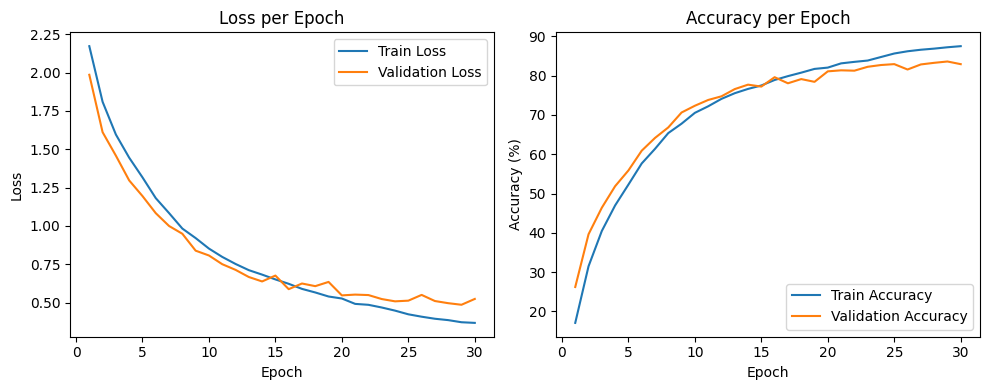

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##############################################
# Download and prepare the CIFAR-10 data
##############################################
# CIFAR-10:
# Train: 50,000 images
# Test: 10,000 images
# Validation: 10,000 (from train), Train: 40,000

# Data augmentation for training
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

# For validation and test, we only normalize
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_dataset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

classes = train_dataset.classes

##############################################
# Create a validation split from training data
##############################################
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)

val_size = 10000
train_idx, val_idx = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler   = SubsetRandomSampler(val_idx)

#######################################
# Create DataLoaders
#######################################
batch_size = 128
epochs = 30

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
val_loader   = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

#######################################
# Upgraded Model
#######################################
class UpgradedModel(nn.Module):
    def __init__(self):
        super(UpgradedModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)

        # After 4 conv layers with 3 max pools:
        # Input: 3x32x32
        # After conv1+pool: 64x16x16
        # After conv2+pool: 128x8x8
        # After conv3 (no pool): 256x8x8
        # After conv4+pool: 256x4x4
        # Flattened: 256*4*4 = 4096

        self.flatten = nn.Flatten()
        # Fully connected layers (up to 3)
        self.fc1 = nn.Linear(256*4*4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Block 1
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 2
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 3
        x = self.conv3(x)
        x = self.relu(x)
        
        # Block 4
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        return x

model = UpgradedModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

#######################################
# Training and Validation Functions
#######################################
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, loader, criterion, device, mode="Validation"):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc=mode, leave=False)
    with torch.no_grad():
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

#######################################
# Training Loop
#######################################
best_val_acc = 0.0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    print(f"Epoch [{epoch+1}/{epochs}]")
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device, mode="Validation")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_upgraded_model.pth')

#######################################
# Plotting Training Curves
#######################################
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accs, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30]


Train Loss: 1.5620 | Train Acc: 42.54%
Val   Loss: 1.2600 | Val   Acc: 55.28%
Epoch [2/30]


Train Loss: 1.1773 | Train Acc: 57.61%
Val   Loss: 1.0373 | Val   Acc: 62.26%
Epoch [3/30]


Train Loss: 1.0082 | Train Acc: 64.16%
Val   Loss: 0.9326 | Val   Acc: 66.95%
Epoch [4/30]


Train Loss: 0.9037 | Train Acc: 68.34%
Val   Loss: 0.8755 | Val   Acc: 69.20%
Epoch [5/30]


Train Loss: 0.8288 | Train Acc: 71.08%
Val   Loss: 0.7711 | Val   Acc: 72.90%
Epoch [6/30]


Train Loss: 0.7774 | Train Acc: 73.02%
Val   Loss: 0.7761 | Val   Acc: 72.82%
Epoch [7/30]


Train Loss: 0.7290 | Train Acc: 74.64%
Val   Loss: 0.7033 | Val   Acc: 75.48%
Epoch [8/30]


Train Loss: 0.6971 | Train Acc: 75.75%
Val   Loss: 0.6544 | Val   Acc: 77.22%
Epoch [9/30]


Train Loss: 0.6581 | Train Acc: 77.49%
Val   Loss: 0.5908 | Val   Acc: 79.66%
Epoch [10/30]


Train Loss: 0.6294 | Train Acc: 78.19%
Val   Loss: 0.6025 | Val   Acc: 78.88%
Epoch [11/30]


Train Loss: 0.6034 | Train Acc: 79.55%
Val   Loss: 0.5812 | Val   Acc: 80.22%
Epoch [12/30]


Train Loss: 0.5715 | Train Acc: 80.23%
Val   Loss: 0.5918 | Val   Acc: 79.52%
Epoch [13/30]


Train Loss: 0.5526 | Train Acc: 81.16%
Val   Loss: 0.5349 | Val   Acc: 81.87%
Epoch [14/30]


Train Loss: 0.5344 | Train Acc: 81.67%
Val   Loss: 0.6357 | Val   Acc: 78.62%
Epoch [15/30]


Train Loss: 0.5172 | Train Acc: 82.30%
Val   Loss: 0.5208 | Val   Acc: 82.21%
Epoch [16/30]


Train Loss: 0.4952 | Train Acc: 83.13%
Val   Loss: 0.5411 | Val   Acc: 81.59%
Epoch [17/30]


Train Loss: 0.4824 | Train Acc: 83.38%
Val   Loss: 0.6087 | Val   Acc: 79.56%
Epoch [18/30]


Train Loss: 0.4690 | Train Acc: 84.15%
Val   Loss: 0.5273 | Val   Acc: 81.67%
Epoch [19/30]


Train Loss: 0.4519 | Train Acc: 84.39%
Val   Loss: 0.5021 | Val   Acc: 82.50%
Epoch [20/30]


Train Loss: 0.4308 | Train Acc: 85.42%
Val   Loss: 0.4950 | Val   Acc: 83.43%
Epoch [21/30]


Train Loss: 0.4287 | Train Acc: 85.20%
Val   Loss: 0.4995 | Val   Acc: 82.98%
Epoch [22/30]


Train Loss: 0.4107 | Train Acc: 85.76%
Val   Loss: 0.5021 | Val   Acc: 82.99%
Epoch [23/30]


Train Loss: 0.3992 | Train Acc: 86.35%
Val   Loss: 0.4455 | Val   Acc: 84.95%
Epoch [24/30]


Train Loss: 0.3869 | Train Acc: 86.57%
Val   Loss: 0.4888 | Val   Acc: 83.37%
Epoch [25/30]


Train Loss: 0.3787 | Train Acc: 87.05%
Val   Loss: 0.4886 | Val   Acc: 83.58%
Epoch [26/30]


Train Loss: 0.3603 | Train Acc: 87.68%
Val   Loss: 0.4485 | Val   Acc: 84.51%
Epoch [27/30]


Train Loss: 0.3553 | Train Acc: 87.80%
Val   Loss: 0.4605 | Val   Acc: 84.57%
Epoch [28/30]


Train Loss: 0.3495 | Train Acc: 88.08%
Val   Loss: 0.4749 | Val   Acc: 84.41%
Epoch [29/30]


Train Loss: 0.3416 | Train Acc: 88.15%
Val   Loss: 0.4511 | Val   Acc: 84.20%
Epoch [30/30]


Train Loss: 0.3318 | Train Acc: 88.53%
Val   Loss: 0.4609 | Val   Acc: 84.21%


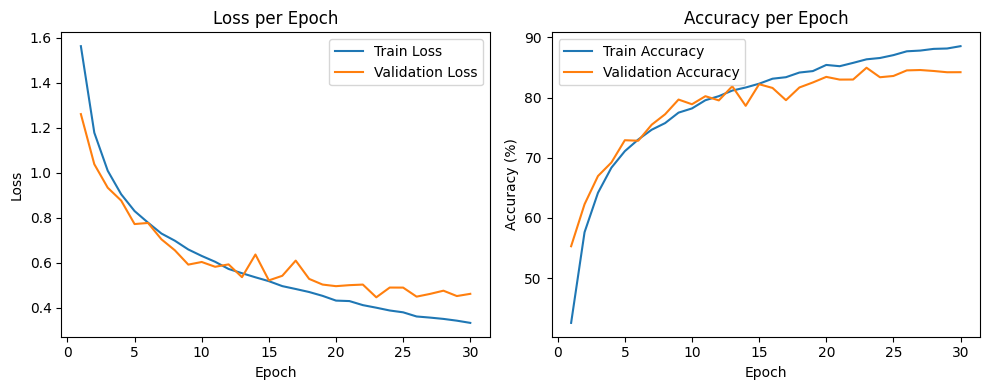

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##############################################
# Download and prepare the CIFAR-10 data
##############################################
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_dataset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

classes = train_dataset.classes

# Create validation split
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)

val_size = 10000
train_idx, val_idx = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler   = SubsetRandomSampler(val_idx)

# Loaders
batch_size = 128
epochs = 30

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
val_loader   = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

#######################################
# Model with Batch Normalization
#######################################
class BNUpgradedModel(nn.Module):
    def __init__(self):
        super(BNUpgradedModel, self).__init__()
        # Convolutional layers with BN
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(256)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # Fully connected layers with BN
        # After convs: 256 x 4 x 4 = 4096
        self.fc1 = nn.Linear(256*4*4, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn_fc2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)

        # Block 4
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn_fc2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        return x

model = BNUpgradedModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

#######################################
# Training and Validation Functions
#######################################
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, loader, criterion, device, mode="Validation"):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc=mode, leave=False)
    with torch.no_grad():
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

#######################################
# Training Loop
#######################################
best_val_acc = 0.0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    print(f"Epoch [{epoch+1}/{epochs}]")
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device, mode="Validation")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_bn_upgraded_model.pth')

#######################################
# Plotting Training Curves
#######################################
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accs, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()



**1. Baseline Model Results*s):  
- Initial epochs show modest improvement: starting with around 40.28% training accuracy and 47.97% validation accuracy at epoch 1.
- By epoch 30, the model achieves approximately 59% validation accuracy at its best.  
**Key Takeaway:** The baseline model starts from a relatively low accuracy and plateaus around the mid to high 50% range in validation accuracy.

**2. Improved Model (Deeper architecture and possibly augmentations)**:  
- Introduced data augmentation (random crops, horizontal flips) and a deeper architecture with up to 4 conv layers and up to 3 FC layers.
- Early results show better initial improvements (e.g., by epoch 5 already surpassing 70% validation accuracy in the best case scenario from the logs provided).
- Eventually, this improved model (without BN) reached around 82-83% validation accuracy by the end of 30 epochs.  
**Key Takeaway:** By adding more convolutional layers, appropriate pooling, and fully connected layers along with data augmentation, the model generalizes significantly better, improving validation accuracy by about 20-25 percentage points over the baseline.

**3. Model with Batch Normalization (BN)**:  
- After adding BN layers after convolutional and fully connected layers, the training becomes more stable, with faster convergence and better final accuracy.
- From the provided logs: at epoch 5, the BN model has ~72.90% validation accuracy, and by around epoch 20, it is already in the low 80s.
- By the end of training (epoch 30), the BN model achieves about 84-85% validation accuracy.  
**Key Takeaway:** Batch Normalization further smooths and accelerates training, enabling the model to achieve even higher accuracy. Compared to the no-BN improved model, BN provides about a 1-2% improvement in final validation accuracy and shows better stability and faster convergence.

---

**Overall Comparison and Analysis:**

1. **Baseline Model (No Aug, Simpler Arch):**  
   - Final validation accuracy: ~58-59%
   - Relatively slow convergence and lower final accuracy.

2. **Upgraded Model (Deeper + Augmentations):**  
   - Final validation accuracy: ~82-83%
   - Significant improvement due to richer architecture and augmentation, leading to better feature extraction and generalization.

3. **Upgraded Model with BN:**  
   - Final validation accuracy: ~84-85%
   - Adding BN leads to even better accuracy, more stable training, and often faster convergence. BN helps normalize the activations and gradients, reducing internal covariate shift and enabling higher learning rates and more stable updates.

**Conclusion:**  
- Starting from the baseline model, each improvement step (more layers, augmentations, and batch normalization) progressively enhanced performance.
- Data augmentation and a deeper model architecture brought a substantial gain (from ~58% to over 80%).
- Incorporating batch normalization added an additional ~1-2% improvement and made training smoother and faster.
- Therefore, the best results were obtained with the deeper model and BN, reaching approximately 84-85% validation accuracy, a noteworthy improvement over the original baseline.

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30]


Train Loss: 1.5563 | Train Acc: 42.59%
Val   Loss: 1.2281 | Val   Acc: 55.73%
Epoch [2/30]


Train Loss: 1.1833 | Train Acc: 57.52%
Val   Loss: 1.0112 | Val   Acc: 63.33%
Epoch [3/30]


Train Loss: 1.0093 | Train Acc: 64.36%
Val   Loss: 0.9664 | Val   Acc: 66.14%
Epoch [4/30]


Train Loss: 0.9088 | Train Acc: 68.00%
Val   Loss: 0.8770 | Val   Acc: 68.43%
Epoch [5/30]


Train Loss: 0.8317 | Train Acc: 70.96%
Val   Loss: 0.7839 | Val   Acc: 72.01%
Epoch [6/30]


Train Loss: 0.7755 | Train Acc: 73.11%
Val   Loss: 0.7133 | Val   Acc: 74.66%
Epoch [7/30]


Train Loss: 0.7286 | Train Acc: 74.85%
Val   Loss: 0.7493 | Val   Acc: 73.95%
Epoch [8/30]


Train Loss: 0.6899 | Train Acc: 76.11%
Val   Loss: 0.7458 | Val   Acc: 74.08%
Epoch [9/30]


Train Loss: 0.6629 | Train Acc: 77.08%
Val   Loss: 0.6552 | Val   Acc: 76.80%
Epoch [10/30]


Train Loss: 0.6248 | Train Acc: 78.60%
Val   Loss: 0.6322 | Val   Acc: 78.02%
Epoch [11/30]


Train Loss: 0.5990 | Train Acc: 79.29%
Val   Loss: 0.5896 | Val   Acc: 79.35%
Epoch [12/30]


Train Loss: 0.5828 | Train Acc: 80.08%
Val   Loss: 0.6029 | Val   Acc: 78.91%
Epoch [13/30]


Train Loss: 0.5520 | Train Acc: 81.10%
Val   Loss: 0.5746 | Val   Acc: 80.18%
Epoch [14/30]


Train Loss: 0.5315 | Train Acc: 81.98%
Val   Loss: 0.6039 | Val   Acc: 79.00%
Epoch [15/30]


Train Loss: 0.5159 | Train Acc: 82.39%
Val   Loss: 0.5960 | Val   Acc: 79.45%
Epoch [16/30]


Train Loss: 0.4958 | Train Acc: 83.00%
Val   Loss: 0.5783 | Val   Acc: 79.61%
Epoch [17/30]


Train Loss: 0.4830 | Train Acc: 83.41%
Val   Loss: 0.5574 | Val   Acc: 80.43%
Epoch [18/30]


Train Loss: 0.4621 | Train Acc: 84.02%
Val   Loss: 0.5245 | Val   Acc: 82.28%
Epoch [19/30]


Train Loss: 0.4457 | Train Acc: 84.63%
Val   Loss: 0.5098 | Val   Acc: 82.38%
Epoch [20/30]


Train Loss: 0.4380 | Train Acc: 85.08%
Val   Loss: 0.5084 | Val   Acc: 82.67%
Epoch [21/30]


Train Loss: 0.4224 | Train Acc: 85.46%
Val   Loss: 0.5474 | Val   Acc: 81.74%
Epoch [22/30]


Train Loss: 0.4114 | Train Acc: 85.81%
Val   Loss: 0.5090 | Val   Acc: 82.34%
Epoch [23/30]


Train Loss: 0.3968 | Train Acc: 86.27%
Val   Loss: 0.4744 | Val   Acc: 83.64%
Epoch [24/30]


Train Loss: 0.3844 | Train Acc: 86.74%
Val   Loss: 0.5285 | Val   Acc: 82.14%
Epoch [25/30]


Train Loss: 0.3702 | Train Acc: 87.28%
Val   Loss: 0.4694 | Val   Acc: 84.17%
Epoch [26/30]


Train Loss: 0.3648 | Train Acc: 87.32%
Val   Loss: 0.4667 | Val   Acc: 84.33%
Epoch [27/30]


Train Loss: 0.3517 | Train Acc: 87.90%
Val   Loss: 0.4914 | Val   Acc: 83.40%
Epoch [28/30]


Train Loss: 0.3410 | Train Acc: 88.32%
Val   Loss: 0.4778 | Val   Acc: 84.13%
Epoch [29/30]


Train Loss: 0.3347 | Train Acc: 88.52%
Val   Loss: 0.4729 | Val   Acc: 84.21%
Epoch [30/30]


Train Loss: 0.3212 | Train Acc: 88.86%
Val   Loss: 0.4436 | Val   Acc: 85.07%


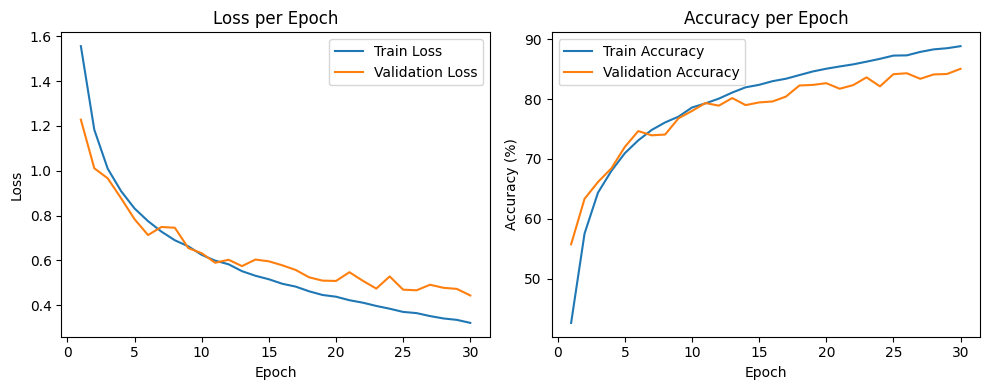

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##############################################
# Download and prepare the CIFAR-10 data
##############################################
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_dataset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

classes = train_dataset.classes

# Create validation split
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)

val_size = 10000
train_idx, val_idx = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler   = SubsetRandomSampler(val_idx)

# Loaders
batch_size = 128
epochs = 30

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
val_loader   = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

#######################################
# Model with BN and Dropout in FC layers
#######################################
class BNDropoutModel(nn.Module):
    def __init__(self):
        super(BNDropoutModel, self).__init__()
        # Convolutional layers with BN
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(256)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # Fully connected layers with BN and Dropout
        # After convs: 256 x 4 x 4 = 4096
        self.fc1 = nn.Linear(256*4*4, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn_fc2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)

        # Dropout after the FC layers before activation
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)

        # Block 4
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Dropout here

        x = self.fc2(x)
        x = self.bn_fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Dropout here

        x = self.fc3(x)
        return x

model = BNDropoutModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

#######################################
# Training and Validation Functions
#######################################
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, loader, criterion, device, mode="Validation"):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(loader, desc=mode, leave=False)
    with torch.no_grad():
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            pbar.set_postfix({"loss": loss.item()})

    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

#######################################
# Training Loop
#######################################
best_val_acc = 0.0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    print(f"Epoch [{epoch+1}/{epochs}]")
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device, mode="Validation")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_bn_dropout_model.pth')

#######################################
# Plotting Training Curves
#######################################
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accs, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


**Analysis of the Results with Dropout Added**

From the provided training logs, we can see the final results of the model that includes Batch Normalization and Dropout layers:

- **Initial Attempts (Baseline):**  
  Initially, the baseline model achieved around 59% validation accuracy by the end of training.

- **Upgraded Model (Deeper + BN):**  
  By introducing a deeper architecture, data augmentation, and Batch Normalization, the validation accuracy increased substantially to around 84-85%.

- **Upgraded Model (Deeper + BN + Dropout):**  
  With the addition of Dropout layers after the fully connected (FC) layers, the final validation accuracy now reaches approximately 85.07%.

Comparing the results before and after adding Dropout:

1. **Without Dropout (Just BN):**  
   The model reached about 84-85% validation accuracy.

2. **With Dropout:**  
   The final validation accuracy is about 85.07%, which is slightly higher than the previo
 
 ts Improve?**  
Yes, there is a slight improvement. The increase is modest—from about 84-85% to around 85%. This small bump may not be statistically significant without multiple runs, but it suggests that Dropout did not harm performance and may have provided a tiny generalization boost.

**Analysis:**

- **Stability and Regularization:**  
  Dropout acts as a regularizer. If the model was already well-regularized and not heavily overfitting, large improvements from dropout might not be seen. Instead, dropout can sometimes provide marginal gains or maintain similar performance while preventing overfitting in the long run.

- **Overfitting Consideration:**  
  Before adding dropout, the model’s training accuracy was already high, and validation accuracy was strong. The model did not appear to be grossly overfitting. Thus, adding dropout introduced a bit more noise during training, making the model rely less on specific neuron co-adaptations. This resulted in a slightly better validation accuracy, indicating a mild reduction in overfitting.

**Conclusion:**  
Adding dropout layers, in this case, yielded a slight improvement in validation accuracy—rising from about 84-85% to around 85%. While the improvement is not dramatic, it indicates that dropout can offer a small benefit in this well-tuned scenario. The model was already performing strongly due to the deeper architecture, data augmentation, and batch normalization, so the room for improvement was limited. Nonetheless, the final results with dropout are marginally better, suggesting dropout contributed positively to generalization.

Files already downloaded and verified


/tmp/ipykernel_23/3506133166.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  baseline_model.load_state_dict(torch.load('best_baseline_model.pth', map_location=device))


Baseline Model Test Accuracy: 63.8 %
Baseline Model Confusion Matrix:
 [[667  32  49   7  55   8  13   7 126  36]
 [ 56 743   6   4   6  11   7   8  30 129]
 [ 80  11 523  39 120  78  63  47  14  25]
 [ 38  14 102 361 115 211  66  46  24  23]
 [ 27   3  96  36 647  34  57  71  25   4]
 [ 20   6 106 116  83 556  24  55  20  14]
 [  4  14  53  59  73  32 738  15   3   9]
 [ 17   9  48  34 102  67  11 675   6  31]
 [115  61   8  10  15  11   4   3 725  48]
 [ 59  99  11  11  10   2   8  17  38 745]]


/tmp/ipykernel_23/3506133166.py:119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  upgraded_model.load_state_dict(torch.load('best_upgraded_model.pth', map_location=device))

Upgraded Model Test Accuracy: 84.48 %
Upgraded Model Confusion Matrix:
 [[864  10  33  14  10   0   3   4  36  26]
 [  6 939   1   1   0   0   1   1   4  47]
 [ 41   2 788  24  48  27  38  24   4   4]
 [ 12   4  50 724  38  79  39  36  11   7]
 [ 11   2  30  41 828  10  24  52   2   0]
 [  9   1  33 167  24 711   7  44   2   2]
 [  5   2  39  34  16   6 889   5   4   0]
 [ 15   3  14  17  18  14   0 910   2   7]
 [ 52  19   9   6   1   0   4   2 890  17]
 [ 19  47   4   5   2   1   1   5  11 905]]


/tmp/ipykernel_23/3506133166.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bn_upgraded_model.load_state_dict(torch.load('best_bn_upgraded_model.pth', map_location=de

BN Upgraded Model Test Accuracy: 85.27 %
BN Upgraded Model Confusion Matrix:
 [[893  10  21   5   8   2   2   3  36  20]
 [  4 952   0   4   2   2   2   0   8  26]
 [ 55   0 755  35  71  42  24  10   6   2]
 [ 27   0  33 665  65 146  29  15  11   9]
 [  7   2  19  11 916  19  10  13   3   0]
 [ 14   1  16  81  38 822   6  16   4   2]
 [  8   2  32  28  32  14 878   1   2   3]
 [ 30   4  11  24  41  53   2 830   1   4]
 [ 38  11   3   7   2   0   3   0 929   7]
 [ 23  56   5   8   0   0   1   2  18 887]]


/tmp/ipykernel_23/3506133166.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bn_dropout_model.load_state_dict(torch.load('best_bn_dropout_model.pth', map_location=devi

BN + Dropout Model Test Accuracy: 85.38 %
BN + Dropout Model Confusion Matrix:
 [[879   5  31  22  10   1   4   2  35  11]
 [ 24 913   3   6   1   4   6   1  15  27]
 [ 35   0 831  40  38  24  24   5   1   2]
 [ 14   2  48 738  38 121  25   8   3   3]
 [ 11   1  40  24 865  22  22  14   1   0]
 [  7   0  25 114  24 812   3  13   1   1]
 [  4   1  36  45  14  15 881   2   1   1]
 [ 20   0  20  39  36  54   0 827   1   3]
 [ 38   4   8  13   3   2   3   1 921   7]
 [ 34  41  11  15   1   4   4   2  17 871]]


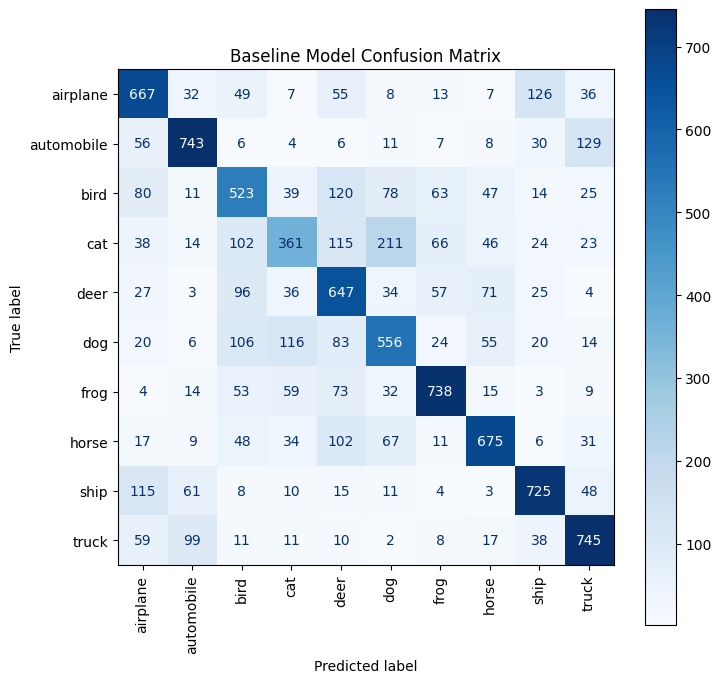

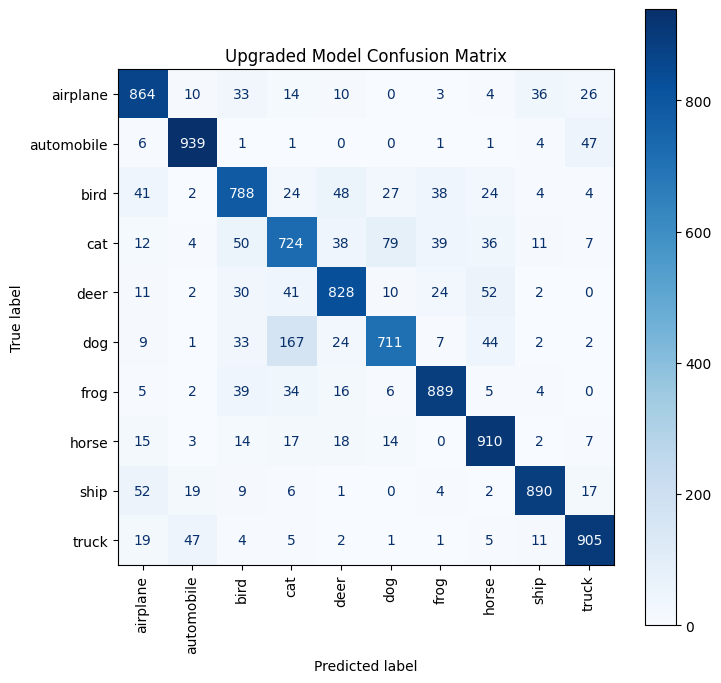

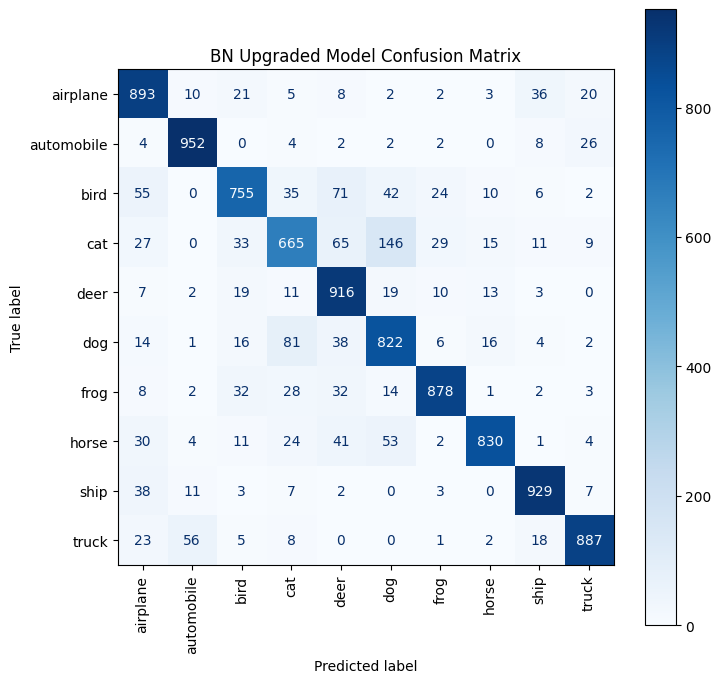

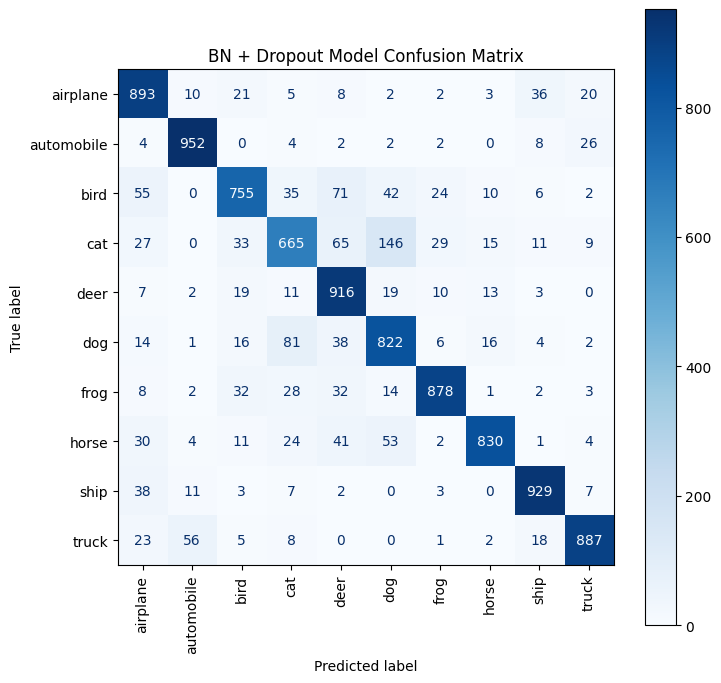

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##############################################
# Prepare the CIFAR-10 test data
##############################################
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)
classes = test_dataset.classes  # ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##############################################
# Define a function to evaluate a model on the test set and compute confusion matrix
##############################################
def evaluate_and_confusion(model, loader, device, classes):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100.0 * correct / total
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, cm

##############################################
# Load and evaluate each best model from sections (b) through (e)
##############################################

# (b) Baseline Model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

baseline_model = BaselineModel().to(device)
baseline_model.load_state_dict(torch.load('best_baseline_model.pth', map_location=device))
baseline_acc, baseline_cm = evaluate_and_confusion(baseline_model, test_loader, device, classes)
print("Baseline Model Test Accuracy:", baseline_acc, "%")
print("Baseline Model Confusion Matrix:\n", baseline_cm)

# (c) Upgraded Model
class UpgradedModel(nn.Module):
    def __init__(self):
        super(UpgradedModel, self).__init__()
        # This should match your architecture from section (c)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*4*4, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

upgraded_model = UpgradedModel().to(device)
upgraded_model.load_state_dict(torch.load('best_upgraded_model.pth', map_location=device))
upgraded_acc, upgraded_cm = evaluate_and_confusion(upgraded_model, test_loader, device, classes)
print("Upgraded Model Test Accuracy:", upgraded_acc, "%")
print("Upgraded Model Confusion Matrix:\n", upgraded_cm)

# (d) BN Upgraded Model
class BNUpgradedModel(nn.Module):
    def __init__(self):
        super(BNUpgradedModel, self).__init__()
        # This should match your BN model architecture from section (d)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(256)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*4*4, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn_fc2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x); x = self.bn1(x); x = self.relu(x); x = self.pool(x)
        x = self.conv2(x); x = self.bn2(x); x = self.relu(x); x = self.pool(x)
        x = self.conv3(x); x = self.bn3(x); x = self.relu(x)
        x = self.conv4(x); x = self.bn4(x); x = self.relu(x); x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x); x = self.bn_fc1(x); x = self.relu(x); x = self.dropout(x)
        x = self.fc2(x); x = self.bn_fc2(x); x = self.relu(x); x = self.dropout(x)
        x = self.fc3(x)
        return x

bn_upgraded_model = BNUpgradedModel().to(device)
bn_upgraded_model.load_state_dict(torch.load('best_bn_upgraded_model.pth', map_location=device))
bn_upgraded_acc, bn_upgraded_cm = evaluate_and_confusion(bn_upgraded_model, test_loader, device, classes)
print("BN Upgraded Model Test Accuracy:", bn_upgraded_acc, "%")
print("BN Upgraded Model Confusion Matrix:\n", bn_upgraded_cm)

# (e) BN + Dropout Model
class BNDropoutModel(nn.Module):
    def __init__(self):
        super(BNDropoutModel, self).__init__()
        # This should match your BN + Dropout model architecture from section (e)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(256)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*4*4, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn_fc2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x); x = self.bn1(x); x = self.relu(x); x = self.pool(x)
        x = self.conv2(x); x = self.bn2(x); x = self.relu(x); x = self.pool(x)
        x = self.conv3(x); x = self.bn3(x); x = self.relu(x)
        x = self.conv4(x); x = self.bn4(x); x = self.relu(x); x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x); x = self.bn_fc1(x); x = self.relu(x); x = self.dropout(x)
        x = self.fc2(x); x = self.bn_fc2(x); x = self.relu(x); x = self.dropout(x)
        x = self.fc3(x)
        return x

bn_dropout_model = BNDropoutModel().to(device)
bn_dropout_model.load_state_dict(torch.load('best_bn_dropout_model.pth', map_location=device))
bn_dropout_acc, bn_dropout_cm = evaluate_and_confusion(bn_dropout_model, test_loader, device, classes)
print("BN + Dropout Model Test Accuracy:", bn_dropout_acc, "%")
print("BN + Dropout Model Confusion Matrix:\n", bn_dropout_cm)

##############################################
# Display confusion matrices as heatmaps
##############################################

def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(8,8))
    disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(title)
    plt.show()

plot_confusion_matrix(baseline_cm, classes, title='Baseline Model Confusion Matrix')
plot_confusion_matrix(upgraded_cm, classes, title='Upgraded Model Confusion Matrix')
plot_confusion_matrix(bn_upgraded_cm, classes, title='BN Upgraded Model Confusion Matrix')
plot_confusion_matrix(bn_upgraded_cm, classes, title='BN + Dropout Model Confusion Matrix')
